In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings('ignore')

In [39]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [40]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [41]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))


153


In [42]:
with open("processed_data.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        print(row)
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

['Suicidal', 'hey look found my social anxiety again was wondering where that went']
['Suicidal', 'depression sucks im in the middle of it rn know some of you are too were going to make it']
['Suicidal', 'lol my social anxiety goes through the roof dunno bout this one mate lol']
['Suicidal', 'how to deal with stress anxiety and bipolar disorder anxiety is one of many troubling symptoms of bipolar di']
['Happy', 'when you want to be friends ppl but ppl think ur mean and unapproachable cus have resting bitch face and sociâ€¦']
['Suicidal', 'went there last monday and almost had an anxiety attack there were so many peopleÿ ©but we only spentâ€¦']
['Suicidal', 'hello hour depression nap do you remember mein monaco made that bracelet']
['Suicidal', 'gossip girl and donald trump give me so much anxiety']
['Suicidal', 'me am gonna make art today theres no reason to be depressed all day my depression']
['Suicidal', 'im glad understand what it is now tho used to go through anxiety attacks be co

['Happy', 'my depression sis tried to beat my ass but still rise']
['Happy', 'through the stress and anxiety gotta smile and laugh']
['Happy', 'when you get tackled and then dog piled at the edge gave me anxiety']
['Happy', 'lately ive been having horrible anxiety and avoiding everyone']
['Happy', 'depression disorders you should know']
['Happy', 'turn anxiety into curiosity']
['Happy', 'this gif gt']
['Happy', 'imagine how nice it would be to not have social anxiety wow wish could relate']
['Happy', 'maybe if fall in love with my anxiety itll leave me too']
['Happy', 'because she was so open about her struggle with mental health']
['Happy', 'depression is depressing']
['Happy', 'anxiety hitting me porque sigo en la facultad las ya es el partid']
['Happy', 'always manage to make up the worst scenarios in my head to the point get anxiety even though know it would never haâ€¦']
['Happy', 'depression is very real and if you cant be positive and look at negative things and see the good out

In [43]:
len(labels),len(sentences)

(2213, 2213)

In [44]:
sentences[:5]

['hey look found social anxiety wondering went',
 'depression sucks im middle rn know going make it',
 'lol social anxiety goes roof dunno bout one mate lol',
 'how deal stress anxiety bipolar disorder anxiety one many troubling symptoms bipolar di',
 'when want friends ppl ppl think ur mean unapproachable cus resting bitch face sociâ€¦']

In [45]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1770
1770
1770
443
443


In [46]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))


7
120
9
120
15
120


In [47]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[2]
[2]
(1770, 1)
[1]
[1]
[1]
(443, 1)


In [48]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

443
(443, 120)


In [69]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
 

Using TensorFlow backend.


In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(1000, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [72]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, None, 128)         82048     
_________________________________________________________________
global_average_pooling1d_5 ( (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 65        
Total params: 220,417
Trainable params: 220,417
Non-trainable params: 0
________________________________________________

In [75]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [76]:
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2,shuffle=True)

Train on 1770 samples, validate on 443 samples
Epoch 1/20
1770/1770 - 11s - loss: -4.9371e+00 - accuracy: 0.6548 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 2/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 3/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 4/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 5/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 6/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 7/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 8/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy: 0.6650 - val_loss: -1.1422e+00 - val_accuracy: 0.9391
Epoch 9/20
1770/1770 - 8s - loss: -6.2026e+00 - accuracy

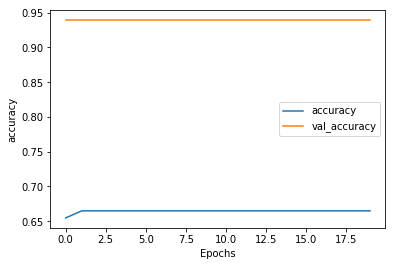

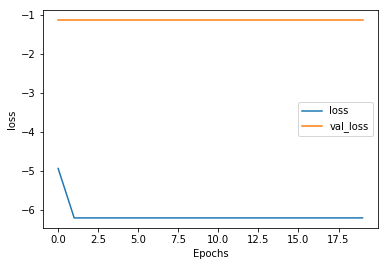

In [77]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)